## Content list

#### 1. Import libraries
#### 2. Import data
#### 3.1. Random Forest data prep (2011 - 2020 data)
#### 3.2. Hyperparameter Optimization (2011 - 2022 data)
#### 3.3. Random Forest (2011 - 2020 data)
#### 3.4. Feature Importance - Random Forest (2011 - 2020 data)
#### 4.1. Random Forest data prep (Madrid)
#### 4.2. Hyperparameter Optimization (Madrid data)
#### 4.3. Random Forest (Madrid data)
#### 4.4. Feature Importance - Random Forest (Madrid data)

## 1. Import libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

## 2. Import data

In [3]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Maching Learning\Climate_Win'

In [4]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Maching Learning\\Climate_Win'

In [5]:
# Import cleaned weather data
df_cw = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'climatewin_cleaned.csv'))

In [6]:
# Check output
df_cw.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,7,0.32,0.85,0.09,1.018,0.7,10.9,6.5,0.8,1,...,2.2,5,0.45,0.88,0.34,1.0003,4.7,10.9,8.5,6.0
1,6,0.36,0.84,1.05,1.018,1.1,10.1,6.1,3.3,6,...,3.0,7,0.25,0.91,0.84,1.0007,0.7,12.1,8.9,5.6
2,8,0.18,0.90,0.30,1.018,0.0,9.9,8.5,5.1,6,...,1.3,7,0.17,0.91,0.08,1.0096,0.1,12.9,10.5,8.1
3,3,0.58,0.92,0.00,1.018,4.1,10.6,6.3,3.8,8,...,0.4,7,0.13,0.86,0.98,1.0184,0.0,10.6,7.4,7.3
4,6,0.65,0.95,0.14,1.018,5.4,6.0,3.0,-0.7,8,...,0.8,3,0.46,0.80,0.00,1.0328,5.7,8.4,5.7,3.0


In [7]:
# Check shape
df_cw.shape

(22950, 135)

In [8]:
# Import climatewin prediction data
df_cw_pred = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
# Check output
df_cw_pred.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Check shape
df_cw_pred.shape

(22950, 16)

In [11]:
# Import original weather data
df_cw_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [12]:
# Check output
df_cw_original.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [13]:
# Check shape
df_cw_original.shape

(22950, 170)

## 3.1. Random Forest data prep (2011 - 2020 data)

In [14]:
# Combine date from original data and cleaned data
df_cw_date = pd.concat([df_cw_original['DATE'],df_cw], axis=1)
df_cw_date

,DATE,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,19600101,7,0.32,0.85,0.09,1.0180,0.7,10.9,6.5,0.8,...,2.2,5,0.45,0.88,0.34,1.0003,4.7,10.9,8.5,6.0
1,19600102,6,0.36,0.84,1.05,1.0180,1.1,10.1,6.1,3.3,...,3.0,7,0.25,0.91,0.84,1.0007,0.7,12.1,8.9,5.6
2,19600103,8,0.18,0.90,0.30,1.0180,0.0,9.9,8.5,5.1,...,1.3,7,0.17,0.91,0.08,1.0096,0.1,12.9,10.5,8.1
3,19600104,3,0.58,0.92,0.00,1.0180,4.1,10.6,6.3,3.8,...,0.4,7,0.13,0.86,0.98,1.0184,0.0,10.6,7.4,7.3
4,19600105,6,0.65,0.95,0.14,1.0180,5.4,6.0,3.0,-0.7,...,0.8,3,0.46,0.80,0.00,1.0328,5.7,8.4,5.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,1.34,0.79,0.22,1.0248,7.7,21.4,15.9,11.4,...,8.2,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22946,20221028,6,1.34,0.77,0.22,1.0244,5.4,21.9,16.7,14.3,...,11.0,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22947,20221029,4,1.34,0.76,0.22,1.0227,6.1,22.4,16.7,13.1,...,12.1,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22948,20221030,5,1.34,0.80,0.22,1.0212,5.8,21.1,15.4,11.6,...,5.1,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9


In [15]:
# Check shape
df_cw_date.shape

(22950, 136)

In [16]:
# Filter weather dataset to 2011 to 2020
df_2010s = df_cw_date.loc[df_cw_date['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])]
df_2010s

,DATE,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
18628,20110101,8,0.13,0.97,0.00,1.0232,0.0,0.3,-0.2,-0.8,...,-4.2,5,0.13,0.82,0.41,1.0142,3.4,6.6,10.7,7.9
18629,20110102,8,0.13,0.94,0.00,1.0234,0.0,1.4,-0.2,-3.9,...,-6.0,5,0.15,0.82,0.41,1.0142,3.4,5.4,10.7,7.9
18630,20110103,4,0.64,0.93,0.00,1.0254,6.1,-0.9,-3.3,-5.2,...,-9.5,5,0.17,0.82,0.41,1.0142,3.4,4.5,10.7,7.9
18631,20110104,6,0.38,0.89,0.00,1.0208,1.0,-1.9,-3.6,-5.8,...,-9.0,5,0.22,0.82,0.41,1.0142,3.4,7.9,10.7,7.9
18632,20110105,5,0.64,0.79,0.06,1.0142,6.5,2.5,-0.8,-5.4,...,-5.6,5,0.23,0.82,0.41,1.0142,3.4,7.8,10.7,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,20201227,8,0.26,0.70,0.41,1.0007,0.0,9.9,1.7,-3.6,...,0.3,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22277,20201228,7,0.26,0.74,0.11,0.9828,0.4,8.1,4.6,1.9,...,3.4,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22278,20201229,6,0.25,0.74,0.22,0.9945,0.2,6.9,4.4,1.6,...,2.7,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22279,20201230,6,0.32,0.85,0.04,1.0069,0.3,4.9,2.6,0.5,...,1.1,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9


In [17]:
# Filter prediction dataset to 2011 to 2020
df_pred_2010s = df_cw_pred.loc[df_cw_pred['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] 
df_pred_2010s

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18628,20110101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18629,20110102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18630,20110103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18631,20110104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18632,20110105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,20201227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22277,20201228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22278,20201229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22279,20201230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Drop 'DATE' columns from 2020 weather dataset
df_2010s_nodate = df_2010s.drop(columns=['DATE'])

# Check output
df_2010s_nodate

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
18628,8,0.13,0.97,0.00,1.0232,0.0,0.3,-0.2,-0.8,4,...,-4.2,5,0.13,0.82,0.41,1.0142,3.4,6.6,10.7,7.9
18629,8,0.13,0.94,0.00,1.0234,0.0,1.4,-0.2,-3.9,8,...,-6.0,5,0.15,0.82,0.41,1.0142,3.4,5.4,10.7,7.9
18630,4,0.64,0.93,0.00,1.0254,6.1,-0.9,-3.3,-5.2,7,...,-9.5,5,0.17,0.82,0.41,1.0142,3.4,4.5,10.7,7.9
18631,6,0.38,0.89,0.00,1.0208,1.0,-1.9,-3.6,-5.8,4,...,-9.0,5,0.22,0.82,0.41,1.0142,3.4,7.9,10.7,7.9
18632,5,0.64,0.79,0.06,1.0142,6.5,2.5,-0.8,-5.4,1,...,-5.6,5,0.23,0.82,0.41,1.0142,3.4,7.8,10.7,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,8,0.26,0.70,0.41,1.0007,0.0,9.9,1.7,-3.6,7,...,0.3,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22277,7,0.26,0.74,0.11,0.9828,0.4,8.1,4.6,1.9,4,...,3.4,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22278,6,0.25,0.74,0.22,0.9945,0.2,6.9,4.4,1.6,2,...,2.7,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9
22279,6,0.32,0.85,0.04,1.0069,0.3,4.9,2.6,0.5,7,...,1.1,5,1.13,0.82,0.41,1.0142,3.4,13.5,10.7,7.9


In [19]:
# Drop 'DATE' columns from 2020 prediction dataset
df_pred_2010s_nodate = df_pred_2010s.drop(columns=['DATE'])

# Check output
df_pred_2010s_nodate

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18629,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18630,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y = df_pred_2010s_nodate.max(axis=1)
print("Shape of y_combined:", y.shape)

Shape of y_combined: (3653,)


In [21]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_combined:", y.unique())

Unique values in y_combined: [0 1]


In [22]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

In [23]:
# Check y shape
y.shape

(3653,)

In [24]:
# Create X matrix
X = df_2010s_nodate.to_numpy()

In [25]:
# Check shapes
print(X.shape)
print(y.shape)

(3653, 135)
(3653,)


In [26]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(914, 135) (914,)


## 3.2 Hyperparameter Optimization (2011-2020 data)

In [31]:
# Creating a Random Forest classifier
clf_2010s = RandomForestClassifier() 

In [37]:
# Set up Grid search space
grid_space={'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [38]:
# Run Grid search
start = time.time()
grid = GridSearchCV(clf_2010s,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 1.6839767495791118 minutes


In [39]:
# Show Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 15, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.9744432274552756


## 3.3. Random Forest (2011 - 2020 data)

In [42]:
# Creating a Random Forest classifier using best result from grid search
clf_2010s_best = RandomForestClassifier(
    n_estimators = 100, 
    max_depth=None, 
    max_features=15, 
    min_samples_leaf=3, 
    min_samples_split=3, 
    criterion = 'gini'
)

In [43]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2010s_best.fit(X_train, y_train)

RandomForestClassifier(max_features=15, min_samples_leaf=3, min_samples_split=3)

In [44]:
# Perform the predictions on the test dataset
y_pred = clf_2010s_best.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9781181619256017


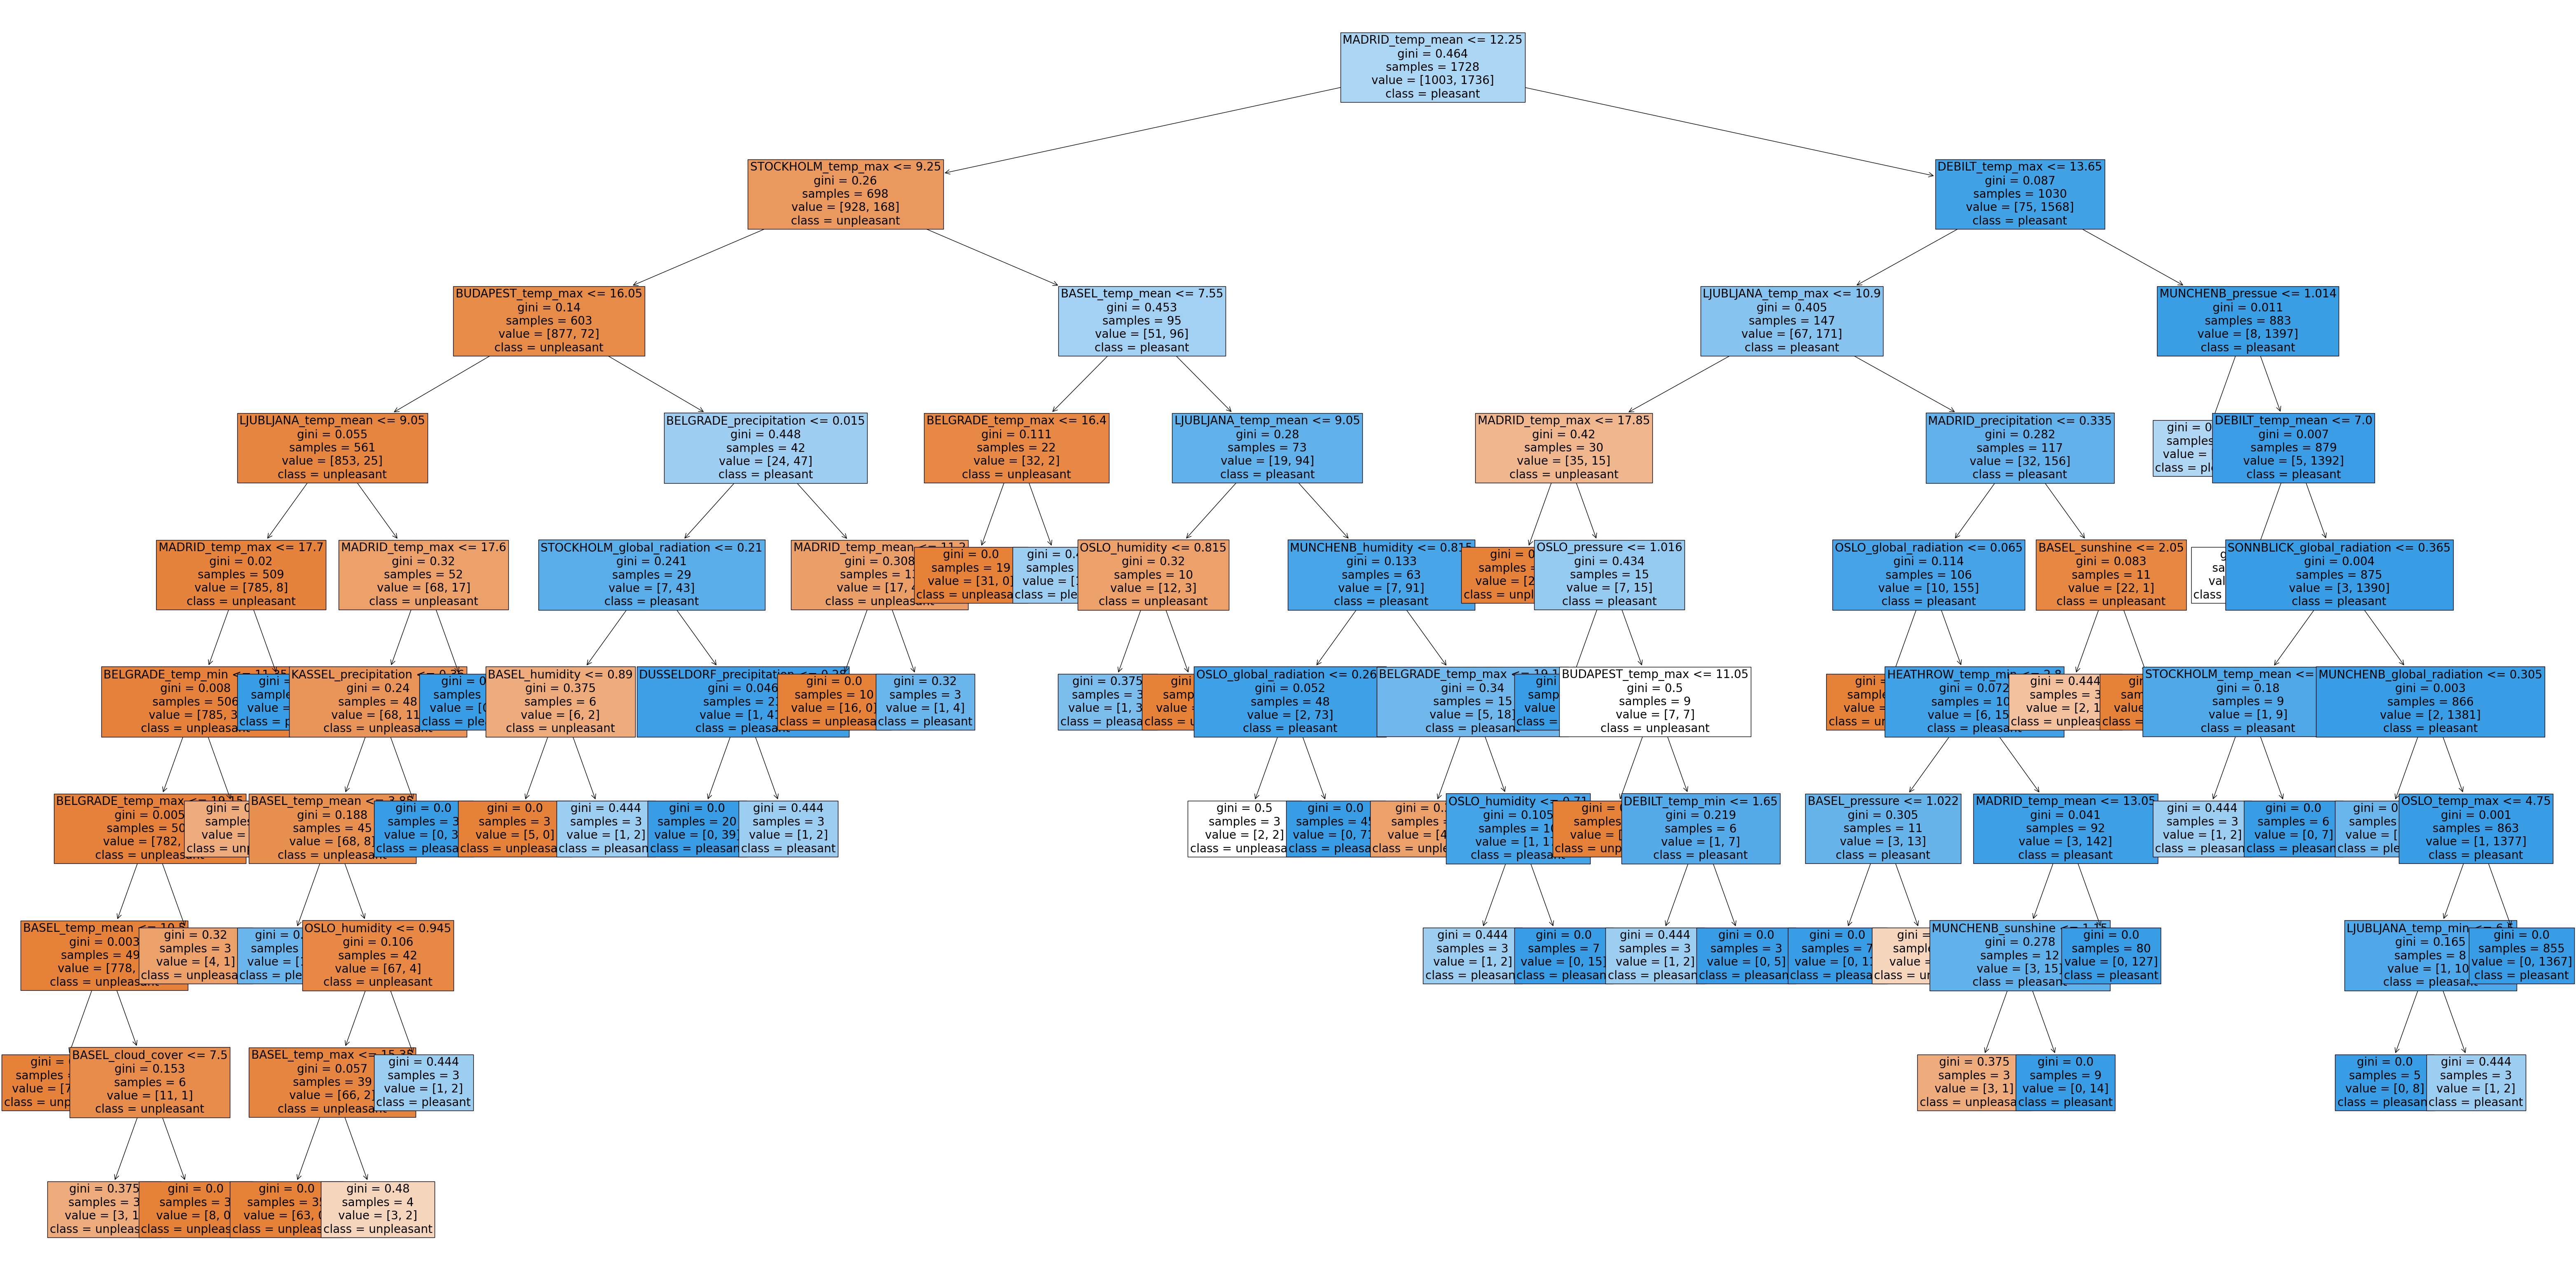

In [47]:
# Plot random forest (2011 - 2020) - Tree
rf_2010s_1 = plt.figure(figsize=(80,40))
plot_tree(clf_2010s_best.estimators_[5], fontsize = 20, feature_names=df_2010s_nodate.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [48]:
# Save random forest (2011 - 2022) - tree visualization
rf_2010s_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'random_forest_2011to2020_optimized.png'),bbox_inches='tight')

## 3.4. Feature Importance - Random Forest (2011 - 2020 data)

In [49]:
# Retrieve feature importances from the trained model
feature_importances_2010s = clf_2010s_best.feature_importances_
print("Feature Importances:", feature_importances_2010s)
print(feature_importances_2010s.shape)

Feature Importances: [2.59501272e-04 1.10415189e-03 7.20363903e-04 2.94885705e-04
 7.43061879e-04 6.53427609e-04 5.15367413e-02 7.01194565e-02
 2.07354641e-03 1.17760876e-03 9.39950495e-04 1.25232218e-03
 2.27246956e-03 8.33705972e-04 9.41440750e-04 4.50493193e-02
 1.26026842e-02 3.13742337e-03 0.00000000e+00 4.32979133e-04
 0.00000000e+00 5.51970780e-04 0.00000000e+00 2.82363056e-04
 5.28356960e-02 5.38652386e-02 1.35263727e-02 4.42375272e-04
 2.90399487e-03 6.51926254e-04 4.57089713e-04 1.35273375e-03
 6.85685586e-04 4.39224492e-02 1.01407750e-03 7.14459256e-04
 1.97353879e-04 7.41751415e-04 3.98968750e-04 4.38175174e-04
 8.30586057e-04 3.47287549e-04 7.65668693e-03 1.39975937e-02
 7.99257885e-04 3.98567947e-04 5.13019708e-03 1.33451058e-03
 4.23112867e-04 9.52016527e-04 8.57257147e-04 1.21167302e-02
 3.19158198e-03 7.38108634e-04 2.98468664e-04 1.84678531e-04
 2.40773104e-04 8.83891301e-05 1.14973709e-04 8.18733722e-05
 6.07292929e-04 5.73228894e-04 9.39407210e-05 3.21591446e-04
 3.

In [50]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2010s = feature_importances_2010s.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2010s.shape)

Reshaped Importances Shape: (1, 15, 9)


In [51]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2010s = np.sum(reshaped_importances_2010s[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2010s.shape)
print("Collapsed Importances:", collapsed_importances_2010s)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.12750514 0.06820692 0.12149462 0.05214479 0.02540766 0.02514208
 0.00228362 0.16213417 0.02975303 0.29310868 0.04108757 0.0282519
 0.00602999 0.01657568 0.00087414]


In [52]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [53]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_2010s = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2010s
})

In [54]:
# Sort by importance for chart readability
collapsed_importances_2010s = collapsed_importances_2010s.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_2010s)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.293109
7        LJUBLJANA    0.162134
0            BASEL    0.127505
2         BUDAPEST    0.121495
1         BELGRADE    0.068207
3           DEBILT    0.052145
10        MUNCHENB    0.041088
8       MAASTRICHT    0.029753
11            OSLO    0.028252
4       DUSSELDORF    0.025408
5         HEATHROW    0.025142
13       STOCKHOLM    0.016576
12       SONNBLICK    0.006030
6           KASSEL    0.002284
14        VALENTIA    0.000874


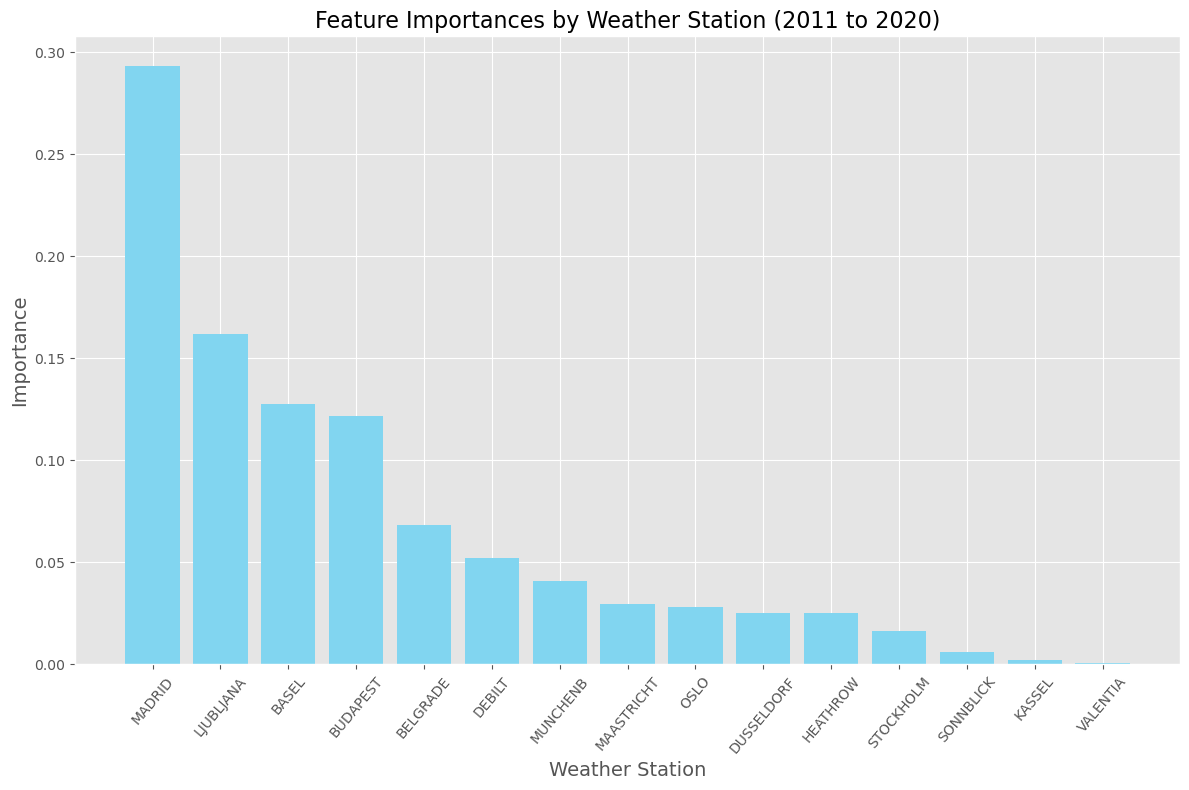

In [55]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_2010s['Weather Station'], collapsed_importances_2010s['Importance'], color='#81d5f0')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2011 to 2020)', fontsize=16)
plt.tight_layout()
plt.show();

In [56]:
# Save chart
plt_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importances_2011to2020_optimized.png'),bbox_inches='tight')

## 4.1. Random Forest data prep (Madrid)

In [57]:
# Filter weather dataset to only include Madrid
df_madrid = df_cw_date[df_cw_date.columns[df_cw_date.columns.astype(str).str.startswith('MADRID')]]
df_madrid

,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min
0,6,0.53,0.92,0.00,1.0260,1.4,10.8,7.6,4.4
1,7,0.46,0.86,0.00,1.0254,0.9,12.2,9.8,7.4
2,5,0.63,0.90,0.00,1.0287,2.3,10.8,8.6,6.4
3,0,1.16,0.75,0.00,1.0281,8.7,16.1,10.3,4.5
4,2,1.10,0.64,0.00,1.0269,7.8,16.0,12.1,8.2
...,...,...,...,...,...,...,...,...,...
22945,8,1.89,0.52,0.12,1.0204,5.3,23.9,20.0,16.2
22946,8,1.89,0.51,0.12,1.0221,3.9,23.5,19.1,14.7
22947,8,1.89,0.46,0.12,1.0186,8.1,22.6,19.0,15.4
22948,5,1.89,0.66,0.12,1.0186,3.1,18.3,15.7,13.1


In [58]:
# Filter prediction dataset to only include Madrid
df_pred_madrid = df_cw_pred[df_cw_pred.columns[df_cw_pred.columns.astype(str).str.startswith('MADRID')]]
df_pred_madrid

,MADRID_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [59]:
# Check shape
print(df_madrid.shape)
print(df_pred_madrid.shape)

(22950, 9)
(22950, 1)


In [60]:
# Create matrices
y_1 = df_pred_madrid.max(axis=1)

# Check shape
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (22950,)


In [61]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [62]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

# Check shape
print(y_1.shape)

(22950,)


In [63]:
# Create X matrix
X_1 = df_madrid.to_numpy()

In [64]:
# Check shapes of the matrices
print(X_1.shape)
print(y_1.shape)

(22950, 9)
(22950,)


In [65]:
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=42)

# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 4.2. Hyperparameter Optimization (Madrid data)¶

In [66]:
# Set up Random search space
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [67]:
# creating a RF classifier
clf_madrid_search= RandomForestClassifier()

In [68]:
# Run random search
start = time.time()
rf_random = RandomizedSearchCV(clf_madrid_search, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.752124269803365 minutes


In [69]:
# Print random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 460}
Best RANDOM search score is: 1.0


## 4.3. Random Forest (Madrid data)

In [70]:
# Creating a Random Forest classifier
clf_madrid = RandomForestClassifier(
    n_estimators = 460, 
    max_depth=50, 
    max_features=6, 
    min_samples_leaf=2, 
    min_samples_split=6, 
    criterion = 'entropy'
)

In [71]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_madrid.fit(X_train_1, y_train_1)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=6,
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=460)

In [73]:
# Perform the predictions on the test dataset
y_pred_1 = clf_madrid.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  1.0


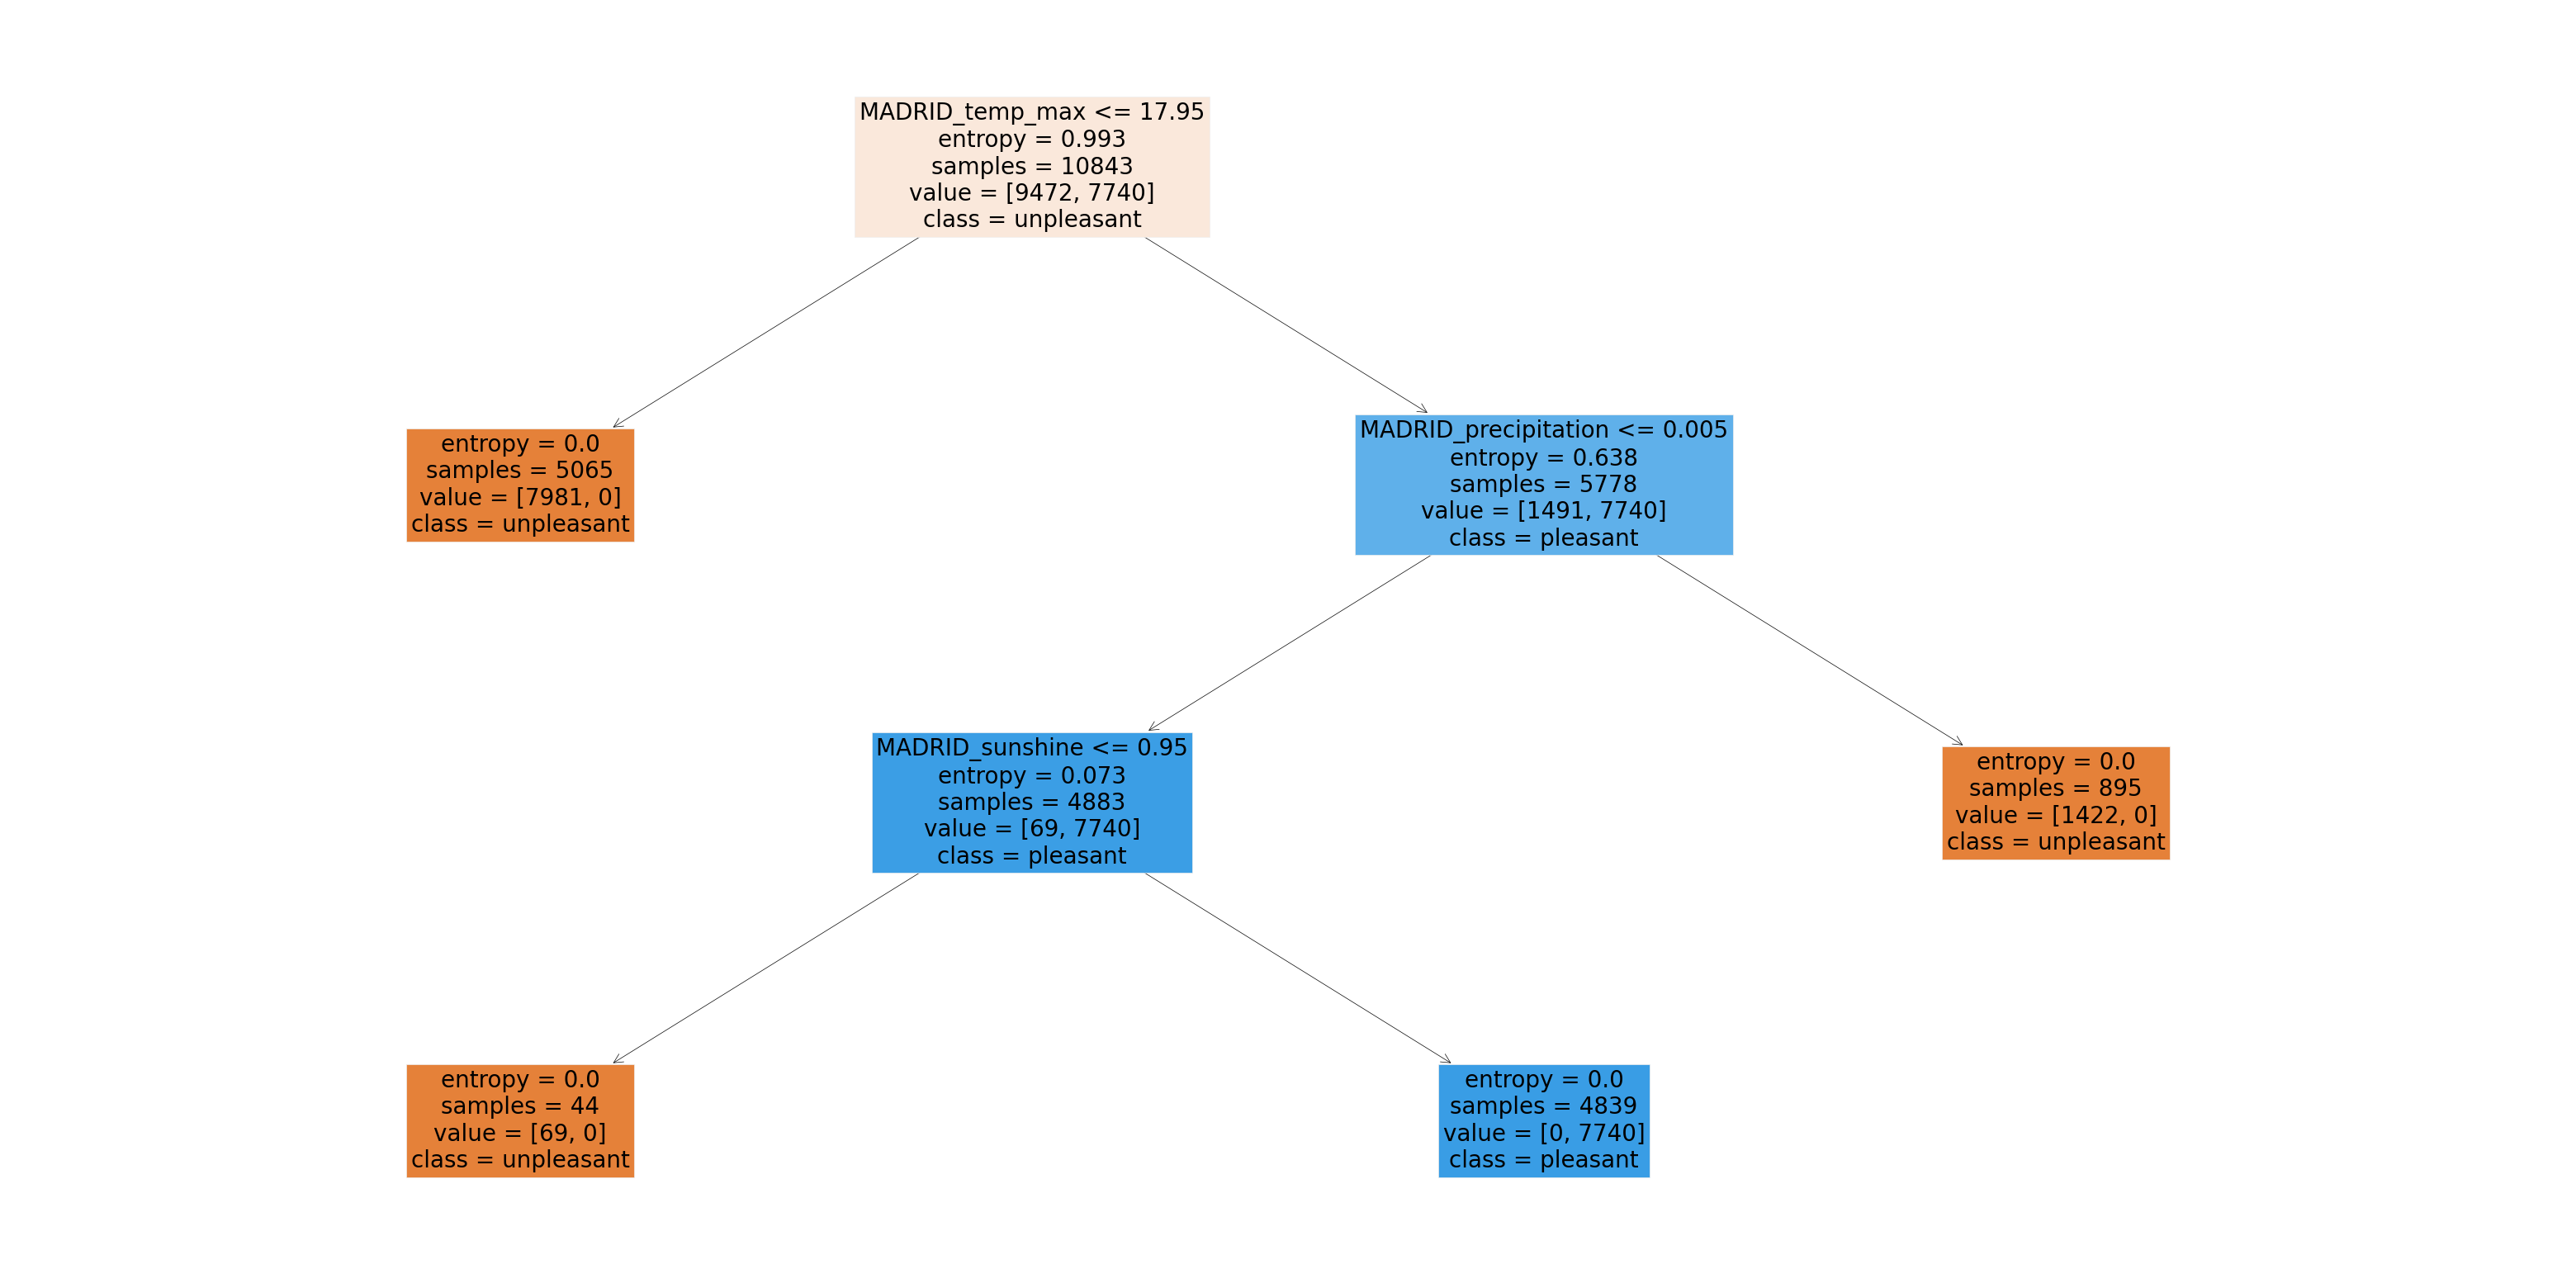

In [74]:
# Plot random forest - Madrid
rf_madrid = plt.figure(figsize=(40,20))
plot_tree(clf_madrid.estimators_[5], fontsize = 20, feature_names=df_madrid.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [75]:
# Save random forest (madrid) visualization
rf_madrid.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'random_forest_madrid_optimized.png'),bbox_inches='tight')

## 4.4. Feature Importance - Random Forest (Madrid data)

In [76]:
# Retrieve feature importances from the trained model
feature_importances_madrid = clf_madrid.feature_importances_
print("Feature Importances:", feature_importances_madrid)
print(feature_importances_madrid.shape)

Feature Importances: [5.80271554e-03 2.91081714e-02 1.64648393e-03 2.84398711e-01
 3.20912960e-04 4.48270153e-02 4.91893184e-01 1.36656424e-01
 5.34638133e-03]
(9,)


In [77]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'global_radiation', 'humidity', 'precipitation', 'pressure', 'sunshine','temp_max', 'temp_mean', 'temp_min', 
]

In [78]:
# Create a dataframe to associate observation measurements with their importances
importances_df_madrid = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_madrid
})

In [79]:
# Sort by importance for chart readability
importances_df_madrid = importances_df_madrid.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_madrid)

Feature Importance:
        Measurement  Importance
6          temp_max    0.491893
3     precipitation    0.284399
7         temp_mean    0.136656
5          sunshine    0.044827
1  global_radiation    0.029108
0       cloud_cover    0.005803
8          temp_min    0.005346
2          humidity    0.001646
4          pressure    0.000321


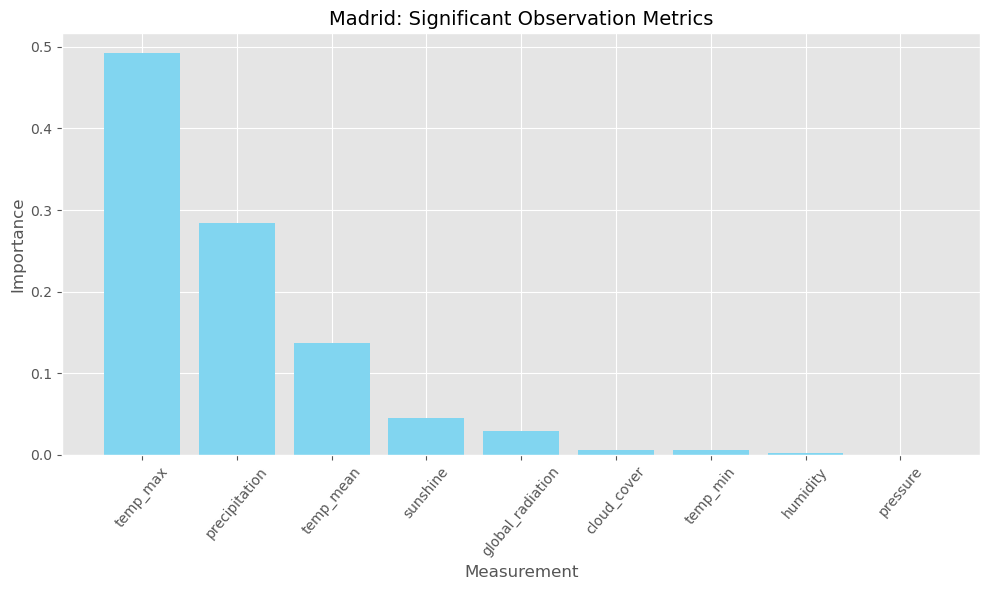

In [80]:
# Plot the importances

plt.style.use('ggplot')
plt_madrid = plt.figure(figsize=(10, 6))
plt.bar(importances_df_madrid['Measurement'], importances_df_madrid['Importance'], color='#81d5f0')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show();

In [81]:
# Save chart - madrid
plt_madrid.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importances_madrid_optimized.png'),bbox_inches='tight')